In [94]:
import pandas as pd
from google.colab import drive
import pandas as pd
import re
import glob
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [95]:
file_path = '/content/drive/MyDrive/TESIS /datos/df_sentiment.csv'

In [96]:
df_final = pd.read_csv(file_path)

In [97]:
df_final['Sentimientos_Coinciden'] = df_final['Sentiment'] == df_final['Sentiment_2']

In [98]:
df_final['Definitive_Sentiment'] = df_final.apply(
    lambda row: row['Sentiment'] if row['Sentimientos_Coinciden'] else row['Sentiment_2'],
    axis=1
)

In [99]:
df_final['Definitive_Sentiment'].value_counts()

,count
Definitive_Sentiment,
positive,1433
negative,611
neutral,256


In [100]:
df_final = df_final.drop(['Sentiment', 'Sentiment_2', 'Overall Comment', 'Name', 'Sentiment_Score', 'Sentiment_Magnitude', 'Detected_Language', 'Reason for Brand Question Rating', 'Restaurant 1 Service Satisfaction:', 'Social Comment'], axis=1)

In [101]:
df_final.rename(columns={'Definitive_Sentiment': 'Sentiment_Label'}, inplace=True)

In [102]:
df_final.head()

,Date,Loyalty Program,ITR,Elite Ap.,Cleanliness,Staff Service,Maintenance and Upkeep,F&B,Reason for Trip,Overall Score,Comment_Length,Month,Year,Year-Month,Season,Service_Quality,Translated Overall Comment,Sentimientos_Coinciden,Sentiment_Label
0,2024-08-29 13:27:06.000,Member,10.0,10.0,10.0,10.0,10.0,10.0,Meeting,5.0,16,8,2024,2024-08,Invierno,10.00,"Excellent as always, the attention, service, c...",True,positive
1,2024-08-28 16:18:09.000,Gold,10.0,10.0,9.0,10.0,9.0,9.0,Meeting,5.0,14,8,2024,2024-08,Invierno,9.25,"Very good, great reception! Free beer and snac...",True,positive
2,2024-08-28 08:48:19.000,Member,10.0,10.0,10.0,10.0,10.0,10.0,Couple,5.0,43,8,2024,2024-08,Invierno,10.00,My wife and I visited Buenos Aires for a weeke...,True,positive
3,2024-08-28 08:28:01.000,Member,10.0,10.0,10.0,10.0,10.0,10.0,Family,5.0,8,8,2024,2024-08,Invierno,10.00,"Great stay, very well located and cozy hotel.",True,positive
4,2024-08-28 08:07:10.000,Member,9.0,10.0,10.0,10.0,10.0,9.0,Meeting,4.5,6,8,2024,2024-08,Invierno,9.75,Very good hotel and pleasant staff.,True,positive


## Análisis y evolución de las reseñas anual

Analizar por año:

* cantidad de labels por tipo de viaje
* evolucion por año-mes de las labels
* evolucion de las labels por tipo de membresia
* mirar si hay alguna tendencia entre el largo del comentario y el label



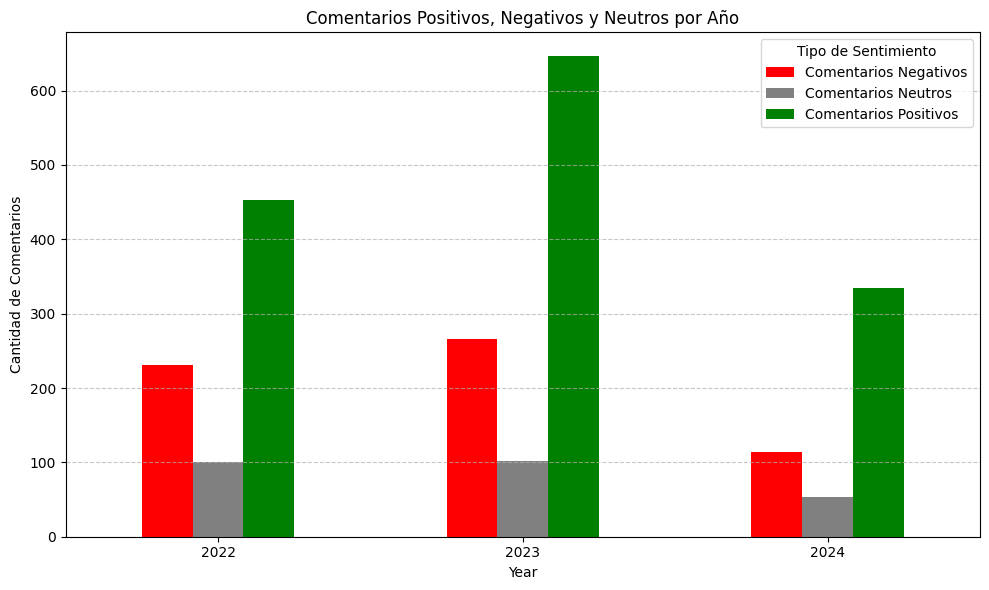

In [103]:
import matplotlib.pyplot as plt
# Agrupar por año y contar los comentarios por etiqueta de sentimiento
sentiment_counts = df_final.groupby(['Year', 'Sentiment_Label']).size().unstack(fill_value=0)

# Renombrar columnas para claridad
sentiment_counts.rename(columns={
    'positive': 'Comentarios Positivos',
    'negative': 'Comentarios Negativos',
    'neutral': 'Comentarios Neutros'
}, inplace=True)

# Visualización
sentiment_counts.plot(kind='bar', figsize=(10, 6), color=['red', 'gray', 'green'])

# Personalización del gráfico
plt.title('Comentarios Positivos, Negativos y Neutros por Año')
plt.ylabel('Cantidad de Comentarios')
plt.xticks(rotation=0)
plt.legend(title='Tipo de Sentimiento')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

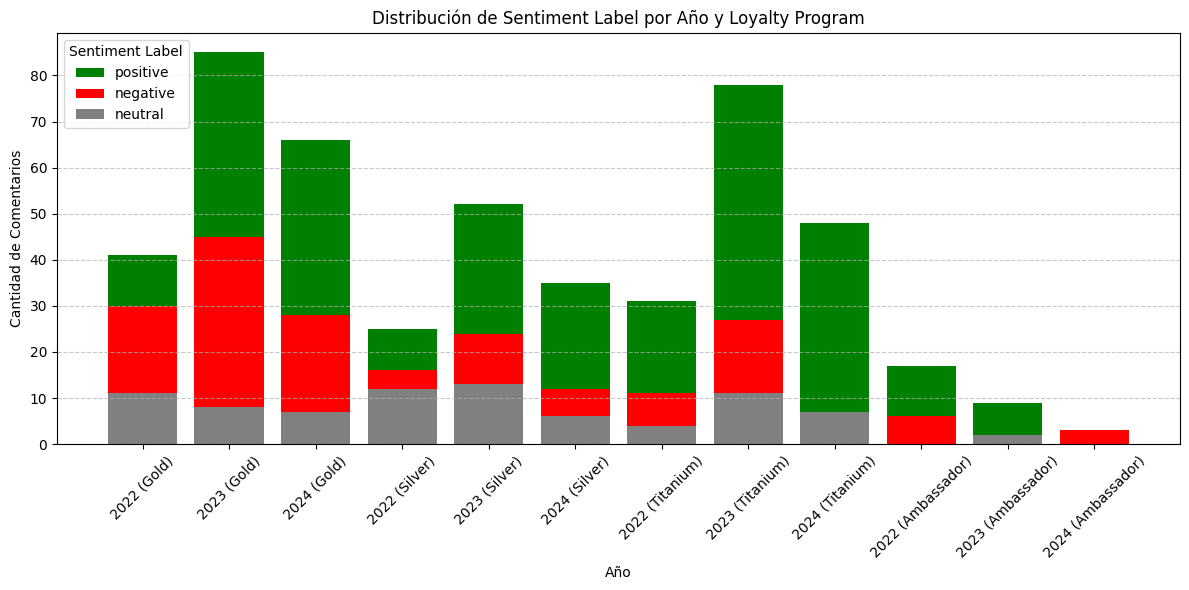

In [104]:
# Filtrar los datos para las categorías deseadas
filtered_df = df_final[df_final['Loyalty Program'].isin(['Gold', 'Silver', 'Titanium', 'Ambassador'])]

# Agrupar por 'Year', 'Loyalty Program' y 'Sentiment_Label' para contar ocurrencias
grouped_data = (
    filtered_df.groupby(['Year', 'Loyalty Program', 'Sentiment_Label'])
    .size()
    .reset_index(name='Count')
)

# Definir colores específicos para cada sentimiento
sentiment_colors = {
    'positive': 'green',
    'negative': 'red',
    'neutral': 'gray'
}

# Configuración del gráfico
plt.figure(figsize=(12, 6))

# Iterar por cada categoría de 'Loyalty Program'
for program in ['Gold', 'Silver', 'Titanium', 'Ambassador']:
    program_data = grouped_data[grouped_data['Loyalty Program'] == program]

    # Iterar por cada sentimiento y trazar las barras
    for sentiment, color in sentiment_colors.items():
        sentiment_data = program_data[program_data['Sentiment_Label'] == sentiment]
        plt.bar(
            sentiment_data['Year'].astype(str) + f" ({program})",  # Etiquetas únicas para cada programa y año
            sentiment_data['Count'],
            color=color,
            label=sentiment if program == 'Gold' else None  # Etiquetas solo una vez para la leyenda
        )

# Personalizar el gráfico
plt.title("Distribución de Sentiment Label por Año y Loyalty Program")
plt.xlabel("Año")
plt.ylabel("Cantidad de Comentarios")
plt.xticks(rotation=45)
plt.legend(title="Sentiment Label", loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

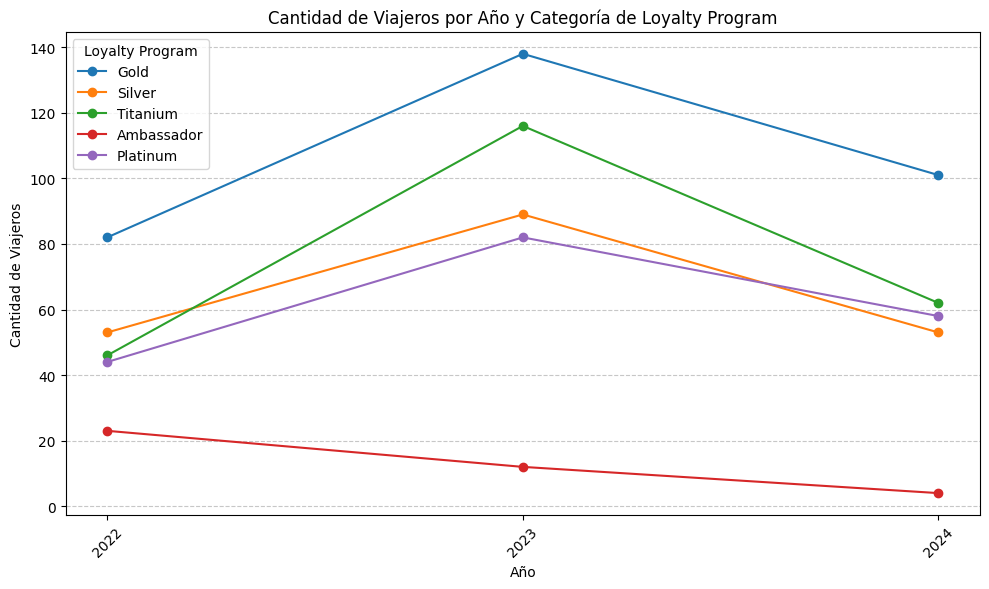

In [105]:
# Filtrar los datos para los valores de 'Loyalty Program' deseados
filtered_df = df_final[df_final['Loyalty Program'].isin(['Gold', 'Silver', 'Titanium', 'Ambassador', 'Platinum'])]

# Agrupar por 'Year' y 'Loyalty Program' para contar los viajeros
grouped_travelers = (
    filtered_df.groupby(['Year', 'Loyalty Program'])
    .size()
    .reset_index(name='Traveler_Count')
)

# Configuración del gráfico
plt.figure(figsize=(10, 6))

# Trazar los datos por cada categoría de Loyalty Program
for program in ['Gold', 'Silver', 'Titanium', 'Ambassador', 'Platinum']:
    program_data = grouped_travelers[grouped_travelers['Loyalty Program'] == program]
    plt.plot(
        program_data['Year'],
        program_data['Traveler_Count'],
        marker='o',
        label=program
    )

# Personalizar el gráfico
plt.title("Cantidad de Viajeros por Año y Categoría de Loyalty Program")
plt.xlabel("Año")
plt.ylabel("Cantidad de Viajeros")
plt.legend(title="Loyalty Program")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(grouped_travelers['Year'].unique(), rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

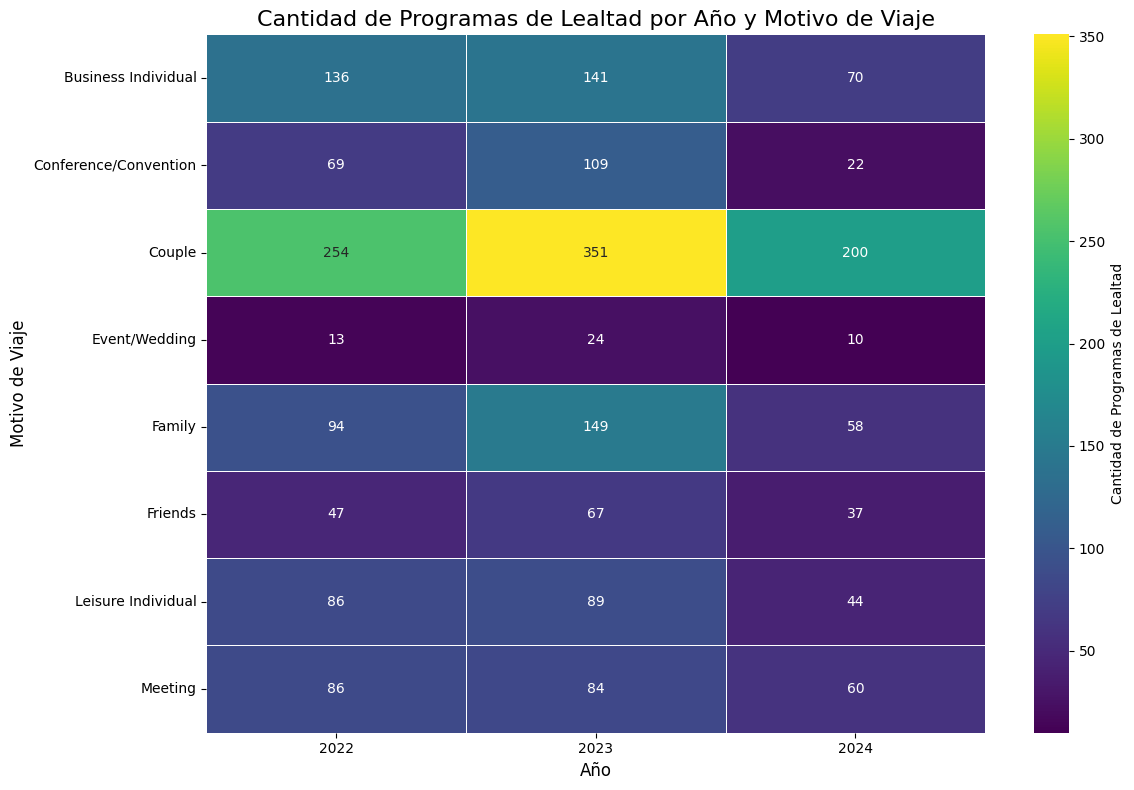

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: Agrupar los datos y pivotar para crear una matriz
data_grouped = df_final.groupby(['Year', 'Reason for Trip', 'Loyalty Program']).size().reset_index(name='Count')
heatmap_data = data_grouped.pivot_table(index='Reason for Trip', columns='Year', values='Count', aggfunc='sum', fill_value=0)

# Paso 2: Crear el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    annot=True,  # Mostrar valores en las celdas
    fmt='d',  # Formato de los valores (enteros)
    cmap='viridis',  # Paleta de colores
    linewidths=0.5,  # Líneas entre celdas
    cbar_kws={'label': 'Cantidad de Programas de Lealtad'}  # Etiqueta para la barra de color
)

# Personalización del gráfico
plt.title('Cantidad de Programas de Lealtad por Año y Motivo de Viaje', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Motivo de Viaje', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


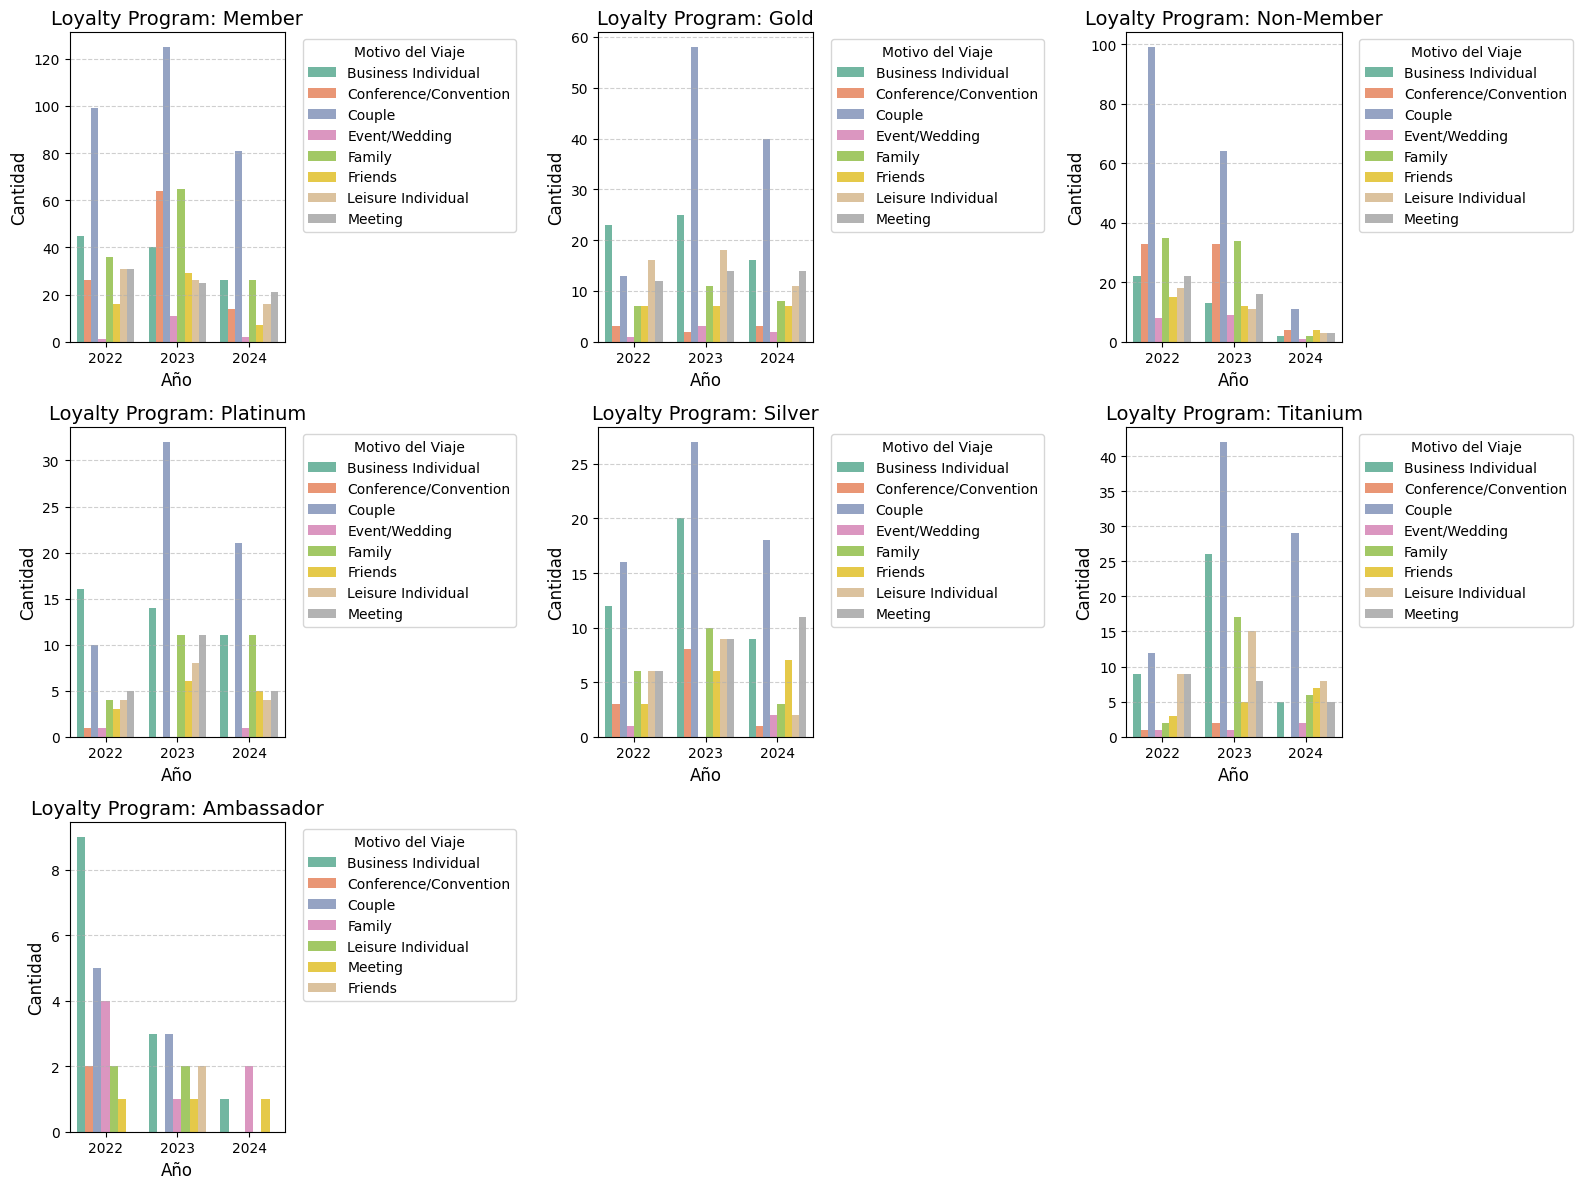

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: Iterar por cada Loyalty Program
loyalty_programs = df_final['Loyalty Program'].unique()

# Ajusta el número de filas y columnas para la cuadrícula
num_rows = 3  # Puedes ajustar este valor según la cantidad de programas de lealtad
num_cols = 3  # Puedes ajustar este valor según la cantidad de programas de lealtad

plt.figure(figsize=(16, 12))  # Tamaño general del canvas

for i, program in enumerate(loyalty_programs, 1):
    # Filtrar datos para el Loyalty Program actual
    filtered_data = df_final[df_final['Loyalty Program'] == program]

    # Agrupar los datos por Reason for Trip y Year
    data_grouped = filtered_data.groupby(['Year', 'Reason for Trip']).size().reset_index(name='Count')

    # Crear el gráfico de barras
    plt.subplot(num_rows, num_cols, i)  # Ajusta el número de filas y columnas
    sns.barplot(
        data=data_grouped,
        x='Year',
        y='Count',
        hue='Reason for Trip',
        ci=None,
        palette='Set2'
    )

    # Personalización
    plt.title(f'Loyalty Program: {program}', fontsize=14)
    plt.xlabel('Año', fontsize=12)
    plt.ylabel('Cantidad', fontsize=12)
    plt.legend(title='Motivo del Viaje', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.6)

# Ajustar los subgráficos
plt.tight_layout()
plt.show()

### Pasos previos

In [108]:
from nltk.stem import WordNetLemmatizer
import nltk
import string
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [109]:
# Cargar módulos y datos
lemmatizer = WordNetLemmatizer()
stopwords_en = set(nltk.corpus.stopwords.words('english'))
punctuation = string.punctuation

def normalize(text):
    # Tokenizamos
    text_tokens = nltk.wordpunct_tokenize(text)

    # Pasamos a minúsculas y alfanumérico
    text_lower_alpha = [token.lower() for token in text_tokens if token.isalnum()]

    # Eliminamos tokens que contengan números
    text_no_numbers = [token for token in text_lower_alpha if not any(char.isdigit() for char in token)]

    # Eliminamos stop-words
    text_clean = [token for token in text_no_numbers if token not in stopwords_en]

    # Lematizamos
    normalized_text = [lemmatizer.lemmatize(word) for word in text_clean]

    return normalized_text

In [110]:
df_final['Normalized Translated Overall Comment'] = df_final['Translated Overall Comment'].apply(normalize)

### Modelado de tópicos por año y sentimiento

In [111]:
from gensim import corpora
from gensim.models import LdaModel, CoherenceModel

# Crear diccionario y corpus para bigramas/trigramas
from gensim.models import Phrases

def preparar_corpus(df, columna_texto):
    # Crear bigramas y trigramas
    bigram = Phrases(df[columna_texto], min_count=5, threshold=100)
    trigram = Phrases(bigram[df[columna_texto]], threshold=100)

    comentarios = [trigram[bigram[texto]] for texto in df[columna_texto]]

    # Diccionario y Corpus
    diccionario = corpora.Dictionary(comentarios)
    diccionario.filter_extremes(no_below=10, no_above=0.5)
    corpus = [diccionario.doc2bow(texto) for texto in comentarios]

    return comentarios, diccionario, corpus

# Aplicar a df_final
comentarios, diccionario, corpus = preparar_corpus(df_final, 'Normalized Translated Overall Comment')

In [112]:
# Funciones para LDA y coherencia
def aplicar_lda(corpus, diccionario, num_topics):
    modelo_lda = LdaModel(corpus=corpus, id2word=diccionario, num_topics=num_topics, random_state=42, passes=10, alpha='auto', eta='auto')
    return modelo_lda

def calcular_coherencia(modelo_lda, textos, diccionario):
    coherence_model = CoherenceModel(model=modelo_lda, texts=textos, dictionary=diccionario, coherence='c_v')
    return coherence_model.get_coherence()

# Entrenar y optimizar por año y sentimiento
def lda_por_año_y_sentimiento(df, year, sentiment):
    df_filtrado = df[(df['Year'] == year) & (df['Sentiment_Label'] == sentiment)]
    comentarios, diccionario, corpus = preparar_corpus(df_filtrado, 'Normalized Translated Overall Comment')

    coherencias = []
    for num_topics in range(2, 11):
        modelo_lda = aplicar_lda(corpus, diccionario, num_topics)
        coherencia = calcular_coherencia(modelo_lda, comentarios, diccionario)
        coherencias.append((num_topics, coherencia))

    mejor_num_temas = max(coherencias, key=lambda x: x[1])
    print(f"{year}-{sentiment}: Mejor número de tópicos: {mejor_num_temas[0]}, Coherencia: {mejor_num_temas[1]:.4f}")

    modelo_lda_optimo = aplicar_lda(corpus, diccionario, mejor_num_temas[0])
    temas = modelo_lda_optimo.print_topics(num_words=10)

    for tema in temas:
        print(f"{year}-{sentiment}: Tema {tema[0]}: {tema[1]}")
    return modelo_lda_optimo, comentarios, diccionario, corpus

# Aplicar por cada combinación
for year in df_final['Year'].unique():
    for sentiment in ['positive', 'negative']:
        lda_por_año_y_sentimiento(df_final, year, sentiment)

2024-positive: Mejor número de tópicos: 10, Coherencia: 0.3731
2024-positive: Tema 0: 0.104*"always" + 0.094*"excellent" + 0.087*"attention" + 0.079*"location" + 0.075*"service" + 0.075*"hotel" + 0.069*"point" + 0.067*"great" + 0.051*"perfect" + 0.041*"lounge"
2024-positive: Tema 1: 0.111*"buenos_aire" + 0.110*"hotel" + 0.077*"stay" + 0.059*"thank" + 0.052*"best" + 0.051*"definitely" + 0.043*"people" + 0.037*"location" + 0.034*"pool" + 0.033*"amazing"
2024-positive: Tema 2: 0.123*"room" + 0.106*"stay" + 0.072*"staff" + 0.049*"u" + 0.047*"hotel" + 0.037*"comfortable" + 0.034*"nice" + 0.032*"beautiful" + 0.030*"reception" + 0.026*"would"
2024-positive: Tema 3: 0.107*"hotel" + 0.092*"nice" + 0.090*"good" + 0.067*"food" + 0.067*"room" + 0.046*"breakfast" + 0.042*"location" + 0.037*"loved" + 0.037*"club" + 0.035*"great"
2024-positive: Tema 4: 0.238*"excellent" + 0.187*"good" + 0.185*"service" + 0.078*"location" + 0.061*"staff" + 0.056*"hotel" + 0.026*"attention" + 0.024*"friendly" + 0.024*"

### Modelado con Bert Topic

In [113]:
!pip install bertopic

In [114]:
from bertopic import BERTopic
def aplicar_bertopic(df, year, sentiment):
    df_filtrado = df[(df['Year'] == year) & (df['Sentiment_Label'] == sentiment)]
    comentarios = df_filtrado['Normalized Translated Overall Comment'].apply(' '.join).tolist()

    topic_model = BERTopic(language="english")
    topics, probs = topic_model.fit_transform(comentarios)

    print(f"Tópicos para {year}-{sentiment}:")
    print(topic_model.get_topic_info())

    return topic_model, topics


In [115]:
# Aplicar BERTopic por año y sentimiento
for year in df_final['Year'].unique():
    for sentiment in ['positive', 'negative']:
        aplicar_bertopic(df_final, year, sentiment)

Tópicos para 2024-positive:
   Topic  Count                          Name  \
0      0    280      0_staff_hotel_room_great   
1      1     28      1_buenos_aire_hotel_stay   
2      2     26  2_excellent_always_well_good   

                                      Representation  \
0  [staff, hotel, room, great, service, excellent...   
1  [buenos, aire, hotel, stay, location, best, wo...   
2  [excellent, always, well, good, wonderful, gen...   

                                 Representative_Docs  
0  [great location staff helpful room nice, great...  
1  [nice hotel central buenos aire, buenos aire g...  
2                  [excellent, excellent, excellent]  
Tópicos para 2024-negative:
   Topic  Count                              Name  \
0     -1     33           -1_room_need_well_night   
1      0     42  0_room_bathroom_breakfast_shower   
2      1     39         1_hotel_room_time_service   

                                      Representation  \
0  [room, need, well, night, work

### Análisis 2022

#### Comentarios Positivos

In [116]:
topic_model, topics = aplicar_bertopic(df_final, 2022, 'positive')
representative_docs = topic_model.get_representative_docs()

Tópicos para 2022-positive:
   Topic  Count                                 Name  \
0     -1      5       -1_nice_always_grata_extremely   
1      0    398      0_staff_service_hotel_excellent   
2      1     29  1_excellent_perfect_amazing_correct   
3      2     21                2_good_well_okay_nice   

                                      Representation  \
0  [nice, always, grata, extremely, friendly, exc...   
1  [staff, service, hotel, excellent, room, good,...   
2  [excellent, perfect, amazing, correct, short, ...   
3  [good, well, okay, nice, overall, general, rea...   

                                 Representative_Docs  
0  [extremely nice, nice always, nice friendly nice]  
1  [excellent hotel great staff, excellent locati...  
2                  [excellent, excellent, excellent]  
3                                 [good, good, good]  


In [117]:
# Obtener la información de los tópicos generados por el modelo
topic_info = topic_model.get_topic_info()

# Excluir el tópico -1 (outliers), si no quieres incluirlo
valid_topics = topic_info[topic_info['Topic'] != -1]['Topic']

# Obtener los documentos representativos para cada tópico válido
representative_docs = topic_model.get_representative_docs()

# Iterar sobre todos los tópicos válidos y mostrar los documentos representativos
for topic in valid_topics:
    print(f"Documentos representativos para el tópico {topic}:")
    for doc in representative_docs[topic]:
        print(doc)
    print("\n")

Documentos representativos para el tópico 0:
excellent hotel great staff
excellent location hotel well service everything good
excellent stay good service nice hotel


Documentos representativos para el tópico 1:
excellent
excellent
excellent


Documentos representativos para el tópico 2:
good
good
good




Aqui se destaca el servicio ofrecido por parte del staff por sobre todo. También se muestra conformidad por la ubicación del establecimiento.

#### Comentarios Negativos

In [118]:
topic_model, topics = aplicar_bertopic(df_final, 2022, 'negative')
representative_docs = topic_model.get_representative_docs()

Tópicos para 2022-negative:
   Topic  Count                           Name  \
0     -1    128     -1_room_hotel_service_time   
1      0     42         0_room_one_hotel_night   
2      1     35     1_charged_card_check_hotel   
3      2     13  2_shower_floor_bathroom_water   
4      3     13        3_pool_hotel_closed_spa   

                                      Representation  \
0  [room, hotel, service, time, day, breakfast, o...   
1  [room, one, hotel, night, water, day, door, tw...   
2  [charged, card, check, hotel, room, peso, cred...   
3  [shower, floor, bathroom, water, face, small, ...   
4  [pool, hotel, closed, spa, booked, almundo, em...   

                                 Representative_Docs  
0  [truth disappointment arrived check planned ga...  
1  [rarely write negative review honestly rarity ...  
2  [hotel location good room fine hotel service d...  
3  [great except one even wash one face without g...  
4  [booked pool access via booking restriction ar...  


In [119]:
# Obtener la información de los tópicos generados por el modelo
topic_info = topic_model.get_topic_info()

# Excluir el tópico -1 (outliers), si no quieres incluirlo
valid_topics = topic_info[topic_info['Topic'] != -1]['Topic']

# Obtener los documentos representativos para cada tópico válido
representative_docs = topic_model.get_representative_docs()

# Iterar sobre todos los tópicos válidos y mostrar los documentos representativos
for topic in valid_topics:
    print(f"Documentos representativos para el tópico {topic}:")
    for doc in representative_docs[topic]:
        print(doc)
    print("\n")


Documentos representativos para el tópico 0:
rarely write negative review honestly rarity ever anything negative say hotel feel need provide rather specific concerning buenos aire hotel actually without doubt worst hotel stayed example experienced flooding issue everyday room toilet leaked floor everyday room card deactivated every single day point simply requested new card everyday wait upwards minute front desk ever one person working occasionally two rarity ordered room service via app advertised hotel use app call front desk one hour later ask food told oh app work call guest service food arrive one hour later basically wait two hour room service cold water one day obviously creates problem water pressure whatsoever one day making shower unusable ordering taxi take airport literally took minute front desk achieve took hour check billing completely incorrect colleague actually owe total six additional night despite many attempt trying get resolved still done account incorrectly cred



1. **Problemas Operativos y de Servicio**:
   - **Retrasos y Falta de Preparación**: Numerosos comentarios destacan problemas relacionados con la tardanza en la entrega de habitaciones, incumplimiento de horarios de check-in y check-out, y servicios incompletos o mal gestionados (p. ej., falta de habitaciones preparadas o problemas con las llaves de las habitaciones).
   - **Fallas en los Servicios Básicos**: Se mencionan reiteradamente fallos en instalaciones como duchas, aire acondicionado, spa y seguridad (cajas fuertes). Estos problemas básicos impactan negativamente la percepción de calidad del hotel.
   - **Deficiencias en la Atención al Cliente**: Hay menciones recurrentes a la falta de personal capacitado o disponible para atender adecuadamente las solicitudes, tiempos prolongados de espera, y una actitud poco proactiva para resolver problemas.

2. **Relación Precio-Calidad**:
   - **Altos Costos para Servicios Insuficientes**: Se critica que los precios no son justificados por la calidad de las instalaciones ni del servicio recibido. Ejemplos incluyen cargos adicionales inesperados, costos elevados en servicios como desayuno o estacionamiento, y una percepción general de "pretensión" sin sustancia.
   - **Incoherencia en la Promoción y Entrega del Producto**: Los huéspedes mencionan incongruencias entre lo que se promete en reservas o promociones y lo que efectivamente se entrega, generando frustración y una percepción de deshonestidad.

3. **Condiciones de Infraestructura**:
   - **Mantenimiento Insuficiente**: Las habitaciones presentan problemas significativos, como paredes deterioradas, decoración en mal estado y electrodomésticos rotos.
   - **Acústica y Aislamiento Deficientes**: El ruido externo, ya sea de eventos, personal o vecinos, es un factor recurrente que afecta la calidad del descanso.

4. **Experiencias Excepcionales Escasas**:
   - Entre los comentarios, se identifican pocas menciones de experiencias positivas, como la atención puntual de algunos empleados específicos. Esto contrasta marcadamente con la abrumadora cantidad de críticas negativas.


### Análisis 2023

#### Comentarios Positivos

In [120]:
topic_model, topics = aplicar_bertopic(df_final, 2023, 'positive')
representative_docs = topic_model.get_representative_docs()

Tópicos para 2023-positive:
   Topic  Count                                    Name  \
0     -1      2     -1_employee_food_separate_paragraph   
1      0    496          0_staff_room_service_excellent   
2      1     40                1_buenos_aire_hotel_stay   
3      2     38             2_excellent_good_great_nice   
4      3     34  3_everything_excellent_perfect_nothing   
5      4     19                4_stay_happy_enjoy_quiet   
6      5     17  5_pleasant_satisfactory_pleased_people   

                                      Representation  \
0  [employee, food, separate, paragraph, attentio...   
1  [staff, room, service, excellent, hotel, good,...   
2  [buenos, aire, hotel, stay, great, room, club,...   
3  [excellent, good, great, nice, surprise, magni...   
4  [everything, excellent, perfect, nothing, impe...   
5  [stay, happy, enjoy, quiet, good, balm, soul, ...   
6  [pleasant, satisfactory, pleased, people, ok, ...   

                                 Representative_Do

In [121]:
# Obtener la información de los tópicos generados por el modelo
topic_info = topic_model.get_topic_info()

# Excluir el tópico -1 (outliers), si no quieres incluirlo
valid_topics = topic_info[topic_info['Topic'] != -1]['Topic']

# Obtener los documentos representativos para cada tópico válido
representative_docs = topic_model.get_representative_docs()

# Iterar sobre todos los tópicos válidos y mostrar los documentos representativos
for topic in valid_topics:
    print(f"Documentos representativos para el tópico {topic}:")
    for doc in representative_docs[topic]:
        print(doc)
    print("\n")

Documentos representativos para el tópico 0:
pleasant comfortable room helpful staff beautiful hotel good location
great room location friendly staff
excellent location comfortable room helpful friendly staff


Documentos representativos para el tópico 1:
good place pool best buenos aire comfortable room good breakfast
good location buenos aire clean nice room
everything hotel stay wonderful check check thought service perfect room comfortable clean employee interacted professional friendly super helpful would especially like acknowledge following employee luciana front desk check thank early check late check recommendation made florenzia club thank helping start day positive way friendly greeting warm smile breakfast club also thank recommendation place visit around buenos aire nelson club thank also helping start day positive way always friendly warm greeting would go club wonderful around service even remembering kind omelet wanted would order one antonella club thank also starting 

1. Confort y atención del personal
Comentarios destacados:
"Habitación cómoda, personal amable y servicial."
"Ubicación excelente, personal amigable y siempre dispuesto a ayudar."
"Hotel hermoso con personal atento y habitaciones confortables."
Percepción: Los huéspedes valoran especialmente la combinación de comodidad en las instalaciones y la amabilidad del personal, que contribuyen significativamente a una experiencia positiva.
2. Excelencia general
Comentarios destacados:
"Excelente."
"Todo excelente."
Percepción: Este tópico refuerza una impresión generalizada de satisfacción, con una calificación máxima utilizada frecuentemente para describir la experiencia en el hotel.
3. Satisfacción integral
Comentarios destacados:
"Todo excelente."
"Todo estuvo perfecto."
Percepción: Los huéspedes expresan su agrado por todos los aspectos de su estadía, indicando que el hotel cumplió o superó sus expectativas de manera integral.
4. Estadías memorables
Comentarios destacados:
"Una buena estadía."
"Estadía excelente."
Percepción: Los viajeros califican su experiencia como agradable, enfatizando un balance positivo en su tiempo en el hotel, lo que refuerza su satisfacción general.
5. Ambiente agradable
Comentarios destacados:
"Agradable."
"Todo muy agradable."
Percepción: Este tópico refleja una atmósfera acogedora y agradable que invita al disfrute, dejando una impresión cálida en los huéspedes.

#### Comentarios Negativos

In [122]:
topic_model, topics = aplicar_bertopic(df_final, 2023, 'negative')
representative_docs = topic_model.get_representative_docs()

Tópicos para 2023-negative:
   Topic  Count                                 Name  \
0     -1     85         -1_room_hotel_breakfast_good   
1      0    112               0_room_hotel_stay_told   
2      1     20      1_breakfast_hotel_included_star   
3      2     18               2_noise_room_door_next   
4      3     16  3_need_hotel_renovation_maintenance   
5      4     15         4_shower_water_bathroom_good   

                                      Representation  \
0  [room, hotel, breakfast, good, floor, one, ser...   
1  [room, hotel, stay, told, day, time, asked, wo...   
2  [breakfast, hotel, included, star, part, bar, ...   
3  [noise, room, door, next, hear, talking, noisy...   
4  [need, hotel, renovation, maintenance, old, fa...   
5  [shower, water, bathroom, good, service, floor...   

                                 Representative_Docs  
0  [terrible one worst experience hotel especiall...  
1  [frustrating beginning requested room bathroom...  
2  [best part hotel c

In [123]:
# Obtener la información de los tópicos generados por el modelo
topic_info = topic_model.get_topic_info()

# Excluir el tópico -1 (outliers), si no quieres incluirlo
valid_topics = topic_info[topic_info['Topic'] != -1]['Topic']

# Obtener los documentos representativos para cada tópico válido
representative_docs = topic_model.get_representative_docs()

# Iterar sobre todos los tópicos válidos y mostrar los documentos representativos
for topic in valid_topics:
    print(f"Documentos representativos para el tópico {topic}:")
    for doc in representative_docs[topic]:
        print(doc)
    print("\n")

Documentos representativos para el tópico 0:
frustrating beginning requested room bathroom ventilation air extractor anything every day would told capacity stay night would think point would save room quality air extractor bathroom happened felt getting played manager would call said find solution day nothing bathroom air circulating like sauna stayed like hour vapor would come inside bedroom told dad getting sick one care anything wanted give smaller room tiny twin bed air extractor hard keep room air extractor called least time day nothing ridiculous horrible customer service manager believe roberto antonio said could probably bring fan room cheap awful suggestion well never changed room dad sick addition one night showered cold water heater working first night sheet smelled dirty requested changed night sheet stain asked coffee room never showed forgot traveled never situation day fix guest request try accommodate guest way maybe even day tell oh tomorrow like played every day leave

A partir de los comentarios, se identifican múltiples problemas recurrentes en el hotel, que pueden relacionarse con las observaciones previas. Estos puntos destacan como áreas críticas que afectan la experiencia del huésped:

1. Falta de mantenimiento e infraestructura inadecuada

Problemas comunes:

Habitaciones con deficiencias como puertas, ventanas y cerraduras que no funcionan correctamente.

Baños con problemas graves: ventilación inadecuada, duchas que pierden agua y falta de agua caliente.

Fugas y goteras en habitaciones, incluso en suites de mayor categoría.

Impacto: Estas deficiencias afectan la comodidad básica de los huéspedes y generan frustración al no recibir una solución oportuna por parte del personal.

2. Deficiencias en el servicio al cliente

Casos reportados:
Demoras excesivas en la atención de solicitudes, como cambios de habitación o reparaciones.

Mal manejo de reservas y upgrades prometidos pero no cumplidos.

Falta de proactividad por parte del personal, con casos de promesas incumplidas o solicitudes completamente ignoradas.

Problemas con el check-in y asignación de habitaciones, generando tiempos de espera innecesarios.

Impacto: Los huéspedes perciben una falta de interés y profesionalismo, lo que erosiona su confianza en la marca.

3. Ruido y mala insonorización

Problemas identificados:

Habitaciones mal aisladas donde se escucha todo tipo de ruido, desde conversaciones de habitaciones contiguas hasta ruidos de áreas comunes y del exterior.

Ubicaciones problemáticas, como habitaciones cerca de ascensores o sistemas de aire acondicionado ruidosos.

Impacto: Esto afecta gravemente la calidad del descanso de los huéspedes, especialmente aquellos que buscan relajación.

4. Deficiencias en las instalaciones gastronómicas y servicios generales

Observaciones frecuentes:

Problemas en los servicios de desayuno, con información confusa sobre la inclusión en los paquetes y opciones limitadas de calidad.

Restaurantes y room service lentos, con tiempos de espera excesivos y calidad inconsistente.

Condiciones higiénicas cuestionables en áreas como la piscina y el gimnasio.

Impacto: La percepción de una desconexión entre el precio pagado y el nivel de servicio recibido, generando insatisfacción.

5. Gestión ineficaz y promesas incumplidas

Casos específicos:

Falta de respuesta ante situaciones críticas, como huéspedes que enfrentaron problemas de seguridad o maltrato por otros huéspedes.

Promesas incumplidas por parte del personal de recepción y gerencia, incluyendo beneficios de programas de fidelidad y reservas importantes.

Falta de atención a detalles clave, como taxis olvidados o servicios básicos no realizados.

Impacto: Este tipo de incidentes deteriora gravemente la reputación del hotel, especialmente entre clientes recurrentes y viajeros frecuentes.

### Análisis 2024

#### Comentarios Positivos

In [124]:
topic_model, topics = aplicar_bertopic(df_final, 2024, 'positive')
representative_docs = topic_model.get_representative_docs()

Tópicos para 2024-positive:
   Topic  Count                                      Name  \
0     -1     26           -1_well_excellent_service_great   
1      0    170               0_hotel_room_staff_location   
2      1     52           1_staff_service_excellent_front   
3      2     28                  2_buenos_aire_hotel_stay   
4      3     26              3_excellent_always_well_good   
5      4     16  4_breakfast_service_everything_wonderful   
6      5     16       5_everything_excellent_made_perfect   

                                      Representation  \
0  [well, excellent, service, great, friendly, st...   
1  [hotel, room, staff, location, great, stay, go...   
2  [staff, service, excellent, front, desk, frien...   
3  [buenos, aire, hotel, stay, went, best, beyond...   
4  [excellent, always, well, good, genial, wonder...   
5  [breakfast, service, everything, wonderful, tr...   
6  [everything, excellent, made, perfect, great, ...   

                                 R

In [125]:
# Obtener la información de los tópicos generados por el modelo
topic_info = topic_model.get_topic_info()

# Excluir el tópico -1 (outliers), si no quieres incluirlo
valid_topics = topic_info[topic_info['Topic'] != -1]['Topic']

# Obtener los documentos representativos para cada tópico válido
representative_docs = topic_model.get_representative_docs()

# Iterar sobre todos los tópicos válidos y mostrar los documentos representativos
for topic in valid_topics:
    print(f"Documentos representativos para el tópico {topic}:")
    for doc in representative_docs[topic]:
        print(doc)
    print("\n")

Documentos representativos para el tópico 0:
staff location hotel excellent
nice hotel great location friendly staff
great staff beautiful hotel great room good food excellent location


Documentos representativos para el tópico 1:
excellent service staff
friendly staff excellent service
everything excellent good service attention staff friendly


Documentos representativos para el tópico 2:
wonderful fantastic stay buenos aire
buenos aire great place stay first visit buenos aire location made easy get around different neighborhood hotel great place stay
stay buenos aire delighted discover room stunning view avenida de julio ambiance perfect enjoying stay minor water leak occurred bathroom unfortunately hotel fully booked evening vacant room available u move however following morning pleasantly surprised receive upgrade beautiful room floor offered u breathtaking view heart buenos aire impressed level attention exceptional customer service provided hotel staff including celeste demian 

1. Personal y servicio al cliente

Observaciones frecuentes:

Personal amable y atento en todas las áreas (recepción, desayuno, servicio en general).

Mención destacada de empleados como Celeste, Demian, Juan, Noemí, y Luis por su trato excepcional.

Impacto: Los huéspedes destacaron la excelente atención al cliente, creando una atmósfera amigable y acogedora. Esto resultó en una experiencia más placentera y generó una alta probabilidad de recomendación del hotel a otros viajeros.

2. Ubicación del hotel

Observaciones frecuentes:

La ubicación central fue muy valorada, especialmente por aquellos que visitaron Buenos Aires por primera vez.

Facilita el acceso a diferentes barrios y puntos de interés turístico.

Impacto: La ubicación estratégica contribuyó a una experiencia positiva para los huéspedes, facilitando su movilidad y aumentando la satisfacción general. Se convirtió en un factor clave para que los visitantes recomendaran el hotel.

3. Calidad de las habitaciones

Observaciones frecuentes:

Habitaciones limpias y bien mantenidas con vistas agradables, especialmente aquellas en pisos superiores con vistas a la Avenida de Julio.

En algunos casos, se ofreció un upgrade de habitación como compensación por inconvenientes menores, como una fuga de agua.

Impacto: La comodidad y calidad de las habitaciones mejoraron notablemente la percepción del hotel, lo que generó satisfacción entre los huéspedes y aumentó la probabilidad de repetir la estancia.

4. Servicios adicionales

Observaciones frecuentes:

El servicio de desayuno fue bien recibido, con un personal dispuesto a atender cualquier solicitud especial, como lo hizo Luis al brindar atención personalizada.

La gestión de problemas, como la fuga de agua, fue eficaz, aunque algunos huéspedes notaron que el hotel estaba completamente lleno, lo que dificultó el cambio inmediato de habitación.

Impacto: La rapidez en la resolución de problemas y la calidad de los servicios ofrecidos, como el desayuno, contribuyeron a la percepción positiva del hotel, reforzando la confianza de los clientes.
5.
Manejo de quejas e inconvenientes

Observaciones frecuentes:

Algunos huéspedes mencionaron pequeños problemas, como fugas de agua o inconvenientes con el cambio de habitación, pero estos fueron resueltos rápidamente, incluso con mejoras como upgrades de habitación.

Impacto: Aunque existieron quejas, la gestión eficiente de estas situaciones, como la atención rápida del personal y las soluciones ofrecidas, mitigaron el impacto negativo, dejando a la mayoría de los huéspedes satisfechos con la atención recibida.

6. Valoración general y recomendación

Observaciones frecuentes:

La mayoría de los huéspedes calificaron su experiencia como excelente y mencionaron que recomendarían el hotel a amigos y familiares.

Impacto: La excelente atención al cliente, sumada a la buena ubicación y calidad de los servicios, resultó en una alta satisfacción generalizada, con huéspedes dispuestos a compartir sus experiencias positivas con otros.

#### Comentarios Negativos

In [126]:
topic_model, topics = aplicar_bertopic(df_final, 2024, 'negative')
representative_docs = topic_model.get_representative_docs()

Tópicos para 2024-negative:
   Topic  Count                              Name  \
0     -1     40        -1_room_hotel_need_service   
1      0     39  0_room_bathroom_breakfast_shower   
2      1     35         1_hotel_room_time_service   

                                      Representation  \
0  [room, hotel, need, service, give, asked, nigh...   
1  [room, bathroom, breakfast, shower, could, sta...   
2  [hotel, room, time, service, good, area, stay,...   

                                 Representative_Docs  
0  [frontal desk service poor found wrong room ke...  
1  [surprised bad buffett breakfast enough food c...  
2  [always preferred stay buenos aire time experi...  


In [127]:
# Obtener la información de los tópicos generados por el modelo
topic_info = topic_model.get_topic_info()

# Excluir el tópico -1 (outliers), si no quieres incluirlo
valid_topics = topic_info[topic_info['Topic'] != -1]['Topic']

# Obtener los documentos representativos para cada tópico válido
representative_docs = topic_model.get_representative_docs()

# Iterar sobre todos los tópicos válidos y mostrar los documentos representativos
for topic in valid_topics:
    print(f"Documentos representativos para el tópico {topic}:")
    for doc in representative_docs[topic]:
        print(doc)
    print("\n")

Documentos representativos para el tópico 0:
surprised bad buffett breakfast enough food cold food regarding room room clean bed comfortable lighting bathroom need improved
two room one room stayed cool room cool window drape closed city view open drape room already degree cool disappointed second room room two air vent stayed okay
staff excellent room terrible room dark inadequate lighting desk closet floor beautiful carpet floor bed side table positioned open closet door view building foot away little ambient light window window drape broken extremely hard close bathroom glass unfrosted glass curtain blind visitor staff could see shower came room shower pressure bad refrigerator cool actually made wine water warmer put


Documentos representativos para el tópico 1:
always preferred stay buenos aire time experience bad last day stay noticed someone entered room without permission even though quot disturb quot sign door arrived hotel exhausting day work went room noticed item minibar r

1. **Problemas con la habitación y la comodidad**
   - **Observaciones frecuentes**:
     - Algunos huéspedes mencionaron que las habitaciones eran **oscuras**, con **iluminación inadecuada** y **mobiliario incómodo** como sillas y escritorios. También se mencionaron problemas con la **temperatura** de la habitación y la dificultad para controlar el termostato.
     - En algunos casos, hubo **problemas significativos en el baño**, como **vidrios de duchas inadecuados** y **agua que salpicaba por toda la habitación** debido a la ubicación incorrecta de las divisiones de vidrio.
     - **Impacto**: Estos problemas afectaron la **comodidad** de los huéspedes, reduciendo la calidad de su estancia y generando frustración, especialmente en quienes esperaban un nivel superior de confort. Estos inconvenientes, aunque se mencionaron como posibles soluciones, disminuyeron la percepción general del hotel.

2. **Seguridad y privacidad**
   - **Observaciones frecuentes**:
     - Un huésped reportó que alguien **entró en su habitación sin permiso**, lo que le causó una gran preocupación por su **seguridad y privacidad**. El personal explicó que fue un **empleado del hotel** que cometió el error de ingresar para retirar una bebida del minibar.
     - **Impacto**: Esta situación provocó un **sentimiento de inseguridad** en el huésped, quien expresó que no volvería a hospedarse en el hotel. La **falta de privacidad** y las malas experiencias relacionadas con la seguridad tuvieron un impacto **negativo** considerable, afectando la confianza de los clientes en el manejo de sus datos personales y pertenencias.

3. **Servicio al cliente**
   - **Observaciones frecuentes**:
     - La **atención al cliente** fue un tema recurrente, con muchos huéspedes señalando que **no podían contactar al hotel** fácilmente ni por teléfono ni por correo electrónico. Además, se mencionaron fallos en el servicio de **habitaciones** y **atención al cliente**, como la falta de respuesta ante solicitudes de servicios especiales.
     - Algunos huéspedes destacaron que la **calidad del servicio de desayuno** fue deficiente, con opciones de comida **poco frescas** y **poco apetitosas**, lo que afectó negativamente su experiencia. Otros también mencionaron la **dificultad para obtener ayuda adicional**, como flores o champagne en la habitación.
     - **Impacto**: La **mala comunicación** y la **falta de servicio eficiente** crearon una experiencia frustrante para los huéspedes, lo que disminuyó la percepción general de la calidad del hotel, especialmente en relación con su **valor por el precio**.

4. **Ubicación y características generales del hotel**
   - **Observaciones frecuentes**:
     - La **ubicación** del hotel fue generalmente positiva, con una mención destacada sobre su **buena ubicación** en la ciudad.
     - Sin embargo, se destacaron algunos aspectos negativos de las instalaciones, como la **falta de comodidades adicionales** en el área de la piscina y el spa, además de la **falta de detalles de calidad** en el servicio de té y otros pequeños elementos que los huéspedes esperaban mejorar.
     - **Impacto**: La **ubicación** del hotel se percibió como un punto positivo, pero los **detalles faltantes** en los servicios adicionales y en la atención personalizada afectaron la percepción general. Los huéspedes apreciaron el esfuerzo por mejorar la experiencia, pero consideraron que el hotel no cumplió completamente con sus expectativas, especialmente en un **rango de precios más alto**.

5. **Comida y servicio de desayuno**
   - **Observaciones frecuentes**:
     - El servicio de **desayuno** fue objeto de varias quejas, especialmente por la **mala calidad de la comida** (como pan seco, comida fría, y platos no frescos). Un huésped mencionó que, al salir temprano, se le proporcionó un desayuno empaquetado que contenía una **manzana podrida** y un **sándwich con moho**.
     - **Impacto**: La calidad del **desayuno** afectó negativamente la experiencia, especialmente para quienes esperaban una opción más refinada o adecuada al precio del hotel. La **mala calidad de los alimentos** y el mal manejo de los pedidos para huéspedes con horarios tempranos crearon una **mala impresión** general.

6. **Condiciones de las instalaciones**
   - **Observaciones frecuentes**:
     - Algunos huéspedes mencionaron que la **decoración del hotel** y sus instalaciones en general ya se veían algo **desactualizadas**. Sin embargo, se reconoció que algunas características del hotel, como la **piscina en la azotea**, eran apreciadas por los visitantes.
     - **Impacto**: Aunque las instalaciones no fueron las principales preocupaciones, la **falta de modernización** de ciertos elementos contribuyó a una **percepción de un hotel menos competitivo** en comparación con otros establecimientos de la misma categoría y precios.

### Conclusiones

El análisis de los años 2022 a 2024 muestra una evolución tanto en los aspectos positivos como en las áreas problemáticas. Se identifican tendencias que reflejan esfuerzos de mejora por parte del hotel, pero también persistencia de ciertos problemas estructurales y de servicio.

La atención al cliente evolucionó positivamente, pasando de una percepción de desinterés (2022) a un trato más personalizado (2024).El servicio de desayuno mostró mejoras constantes, especialmente en 2024, donde se percibió mayor dedicación a satisfacer necesidades específicas.

Los problemas de infraestructura (fugas, ventilación) continuaron siendo recurrentes, lo que señala una falta de inversión en mantenimiento.
La mala insonorización afectó la experiencia año tras año.

Algunos de los puntos positivos:

1. Atención del Personal y Servicio: La amabilidad y disposición del personal han sido destacadas consistentemente a lo largo de los años, contribuyendo significativamente a una experiencia positiva. La calidad de atención, especialmente de empleados destacados, fue un factor clave en la satisfacción general de los huéspedes.
2. Comodidad y Calidad de las Habitaciones: Las habitaciones bien mantenidas, limpias y confortables, junto con un buen mantenimiento en general, fueron aspectos valorados positivamente. La calidad de las vistas, la comodidad de las camas y la atención a detalles como upgrades de habitación también fueron resaltados como factores que mejoraron la experiencia.
3. Ubicación: La excelente ubicación del hotel en Buenos Aires, especialmente para aquellos que visitan la ciudad por primera vez, ha sido un punto consistentemente positivo, facilitando el acceso a diversos puntos de interés.
4. Satisfacción Integral: En general, los huéspedes reportaron experiencias satisfactorias, describiendo sus estancias como memorables, agradables y superiores a las expectativas.

Puntos negativos recurrentes:

1. Mantenimiento e Infraestructura: La falta de mantenimiento en algunas áreas clave, como habitaciones, baños y sistemas de aire acondicionado, afectó negativamente la experiencia. Los problemas recurrentes con duchas, cerraduras y fugas de agua generaron frustración entre los huéspedes.
2. Problemas con el Servicio al Cliente: La falta de proactividad del personal, demoras en la atención, y la gestión deficiente de reservas y solicitudes afectaron la percepción del servicio. También se reportaron problemas con la atención telefónica y por correo electrónico, lo que empeoró la comunicación y la resolución de quejas.
3. Ruido y Mala Insonorización: El ruido proveniente de áreas comunes y la falta de aislamiento en habitaciones generaron una mala experiencia de descanso para algunos huéspedes.
4. Problemas en el Servicio Gastronómico: El servicio de desayuno y la calidad de la comida fueron temas recurrentes de queja, destacando la falta de frescura y opciones limitadas, lo que afectó la satisfacción con los servicios de restauración.



El análisis revela una tendencia de mejora en la percepción general del hotel, especialmente en aspectos relacionados con el trato del personal y la gestión de inconvenientes. Sin embargo, persisten fallas críticas en infraestructura y servicio, que impiden alcanzar un estándar acorde al nivel de precios y categoría prometida.

Recomendaciones:
* Inversión en infraestructura: Priorizar reparaciones y renovaciones en baños, ventanas y sistemas de insonorización.
* Capacitación constante: Continuar fortaleciendo al personal con formación en gestión de crisis y atención personalizada.
* Optimización del desayuno: Implementar controles de calidad más estrictos para garantizar estándares elevados en la experiencia gastronómica.
* Seguridad y privacidad: Reforzar protocolos para evitar incidentes como el ingreso no autorizado a habitaciones.

## NPS Modificado

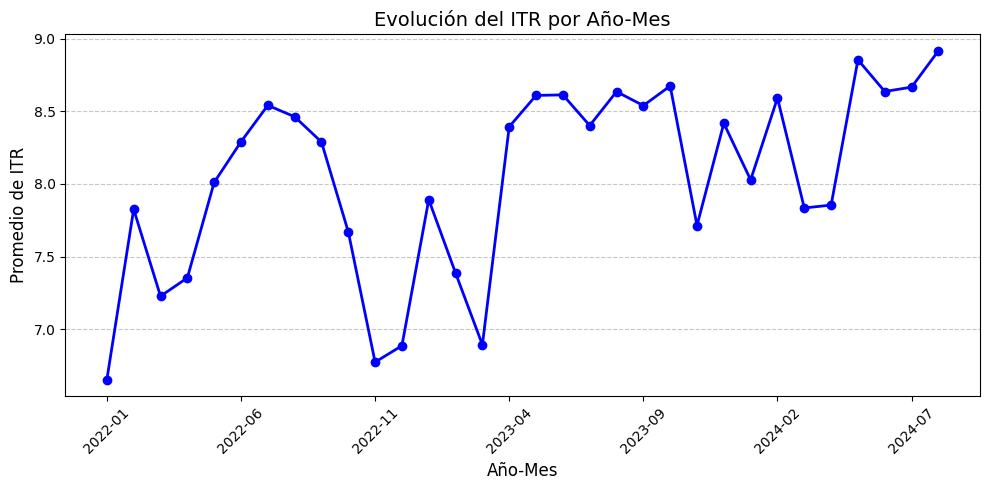

In [128]:
average_score_per_month = df_final.groupby('Year-Month')['ITR'].mean().sort_index()

# Graficar los resultados
plt.figure(figsize=(10, 5))  # Ajusta el tamaño del gráfico
average_score_per_month.plot(kind='line', marker='o', color='blue', linewidth=2)
plt.title('Evolución del ITR por Año-Mes', fontsize=14)
plt.xlabel('Año-Mes', fontsize=12)
plt.ylabel('Promedio de ITR', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [129]:
# Paso 1: Crear una nueva columna 'Category' que clasifique en Promotor, Neutral o Detractor
df_final['Category_ITR'] = df_final['ITR'].apply(
    lambda x: 'Promotor' if x >= 9 else 'Detractor' if x < 7 else 'Neutral'
)

# Paso 2: Crear una matriz de confusión usando crosstab
confusion_matrix = pd.crosstab(
    df_final['ITR'].apply(lambda x: 'Promotor' if x >= 9 else ('Neutral' if 7 <= x <= 8 else 'Detractor')),
    df_final['Sentiment_Label'],
    rownames=['ITR'],
    colnames=['Sentiment Label'],
)

# Paso 3: Mostrar la matriz
print(confusion_matrix)

Sentiment Label  negative  neutral  positive
ITR                                         
Detractor             409       64        13
Neutral               158      107       150
Promotor               44       85      1270


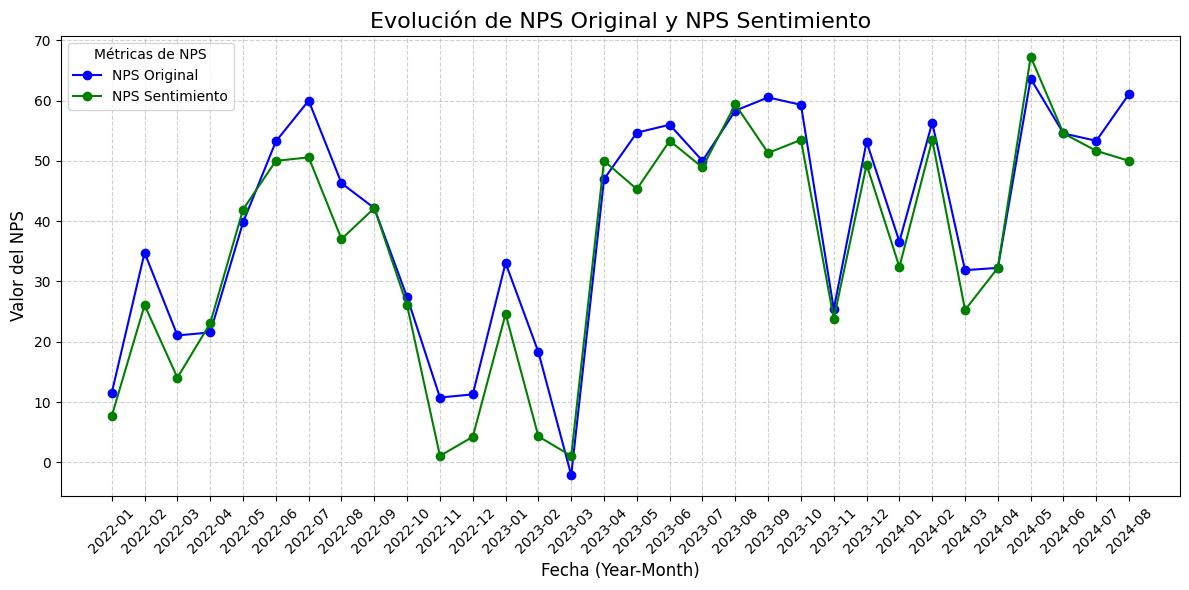

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Paso 2: Calcular el NPS Original y el NPS por Sentimiento
nps_data = df_final.groupby('Year-Month').agg(
    Overall_Score_Mean=('Overall Score', 'mean'),
    Promoters_Original=('Category_ITR', lambda x: (x == 'Promotor').sum()),
    Detractors_Original=('Category_ITR', lambda x: (x == 'Detractor').sum()),
    Neutral_Original=('Category_ITR', lambda x: (x == 'Neutral').sum()),
    Neutral_Sentiment=('Sentiment_Label', lambda x: (x == 'neutral').sum()),
    Positive_Sentiment=('Sentiment_Label', lambda x: (x == 'positive').sum()),
    Negative_Sentiment=('Sentiment_Label', lambda x: (x == 'negative').sum())
).reset_index()



# Calcular totales y proporciones para NPS Original
nps_data['Total_Responses_Original'] = (
    nps_data['Promoters_Original'] +
    nps_data['Detractors_Original'] +
    nps_data['Neutral_Original']
)
nps_data['NPS_Original'] = nps_data.apply(
    lambda row: (((row['Promoters_Original'] / row['Total_Responses_Original']) -
                  (row['Detractors_Original'] / row['Total_Responses_Original'])) * 100)
    if row['Total_Responses_Original'] > 0 else 0,
    axis=1
)

# Calcular totales y proporciones para NPS Sentimiento
nps_data['Total_Responses_Sentiment'] = (
    nps_data['Positive_Sentiment'] +
    nps_data['Negative_Sentiment'] +
    nps_data['Neutral_Sentiment']
)
nps_data['NPS_Sentimiento'] = nps_data.apply(
    lambda row: (((row['Positive_Sentiment'] / row['Total_Responses_Sentiment']) -
                  (row['Negative_Sentiment'] / row['Total_Responses_Sentiment'])) * 100)
    if row['Total_Responses_Sentiment'] > 0 else 0,
    axis=1
)

# Calcular NPS Corregido
nps_data['NPS_Corregido'] = (0.8 * nps_data['NPS_Original'] + nps_data['NPS_Sentimiento']* 0.2)

# Graficar NPS Original y NPS Sentimiento (dos curvas juntas)
plt.figure(figsize=(12, 6))
plt.plot(nps_data['Year-Month'], nps_data['NPS_Original'], label='NPS Original', color='blue', marker='o')
plt.plot(nps_data['Year-Month'], nps_data['NPS_Sentimiento'], label='NPS Sentimiento', color='green', marker='o')
plt.title('Evolución de NPS Original y NPS Sentimiento', fontsize=16)
plt.xlabel('Fecha (Year-Month)', fontsize=12)
plt.ylabel('Valor del NPS', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Métricas de NPS', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



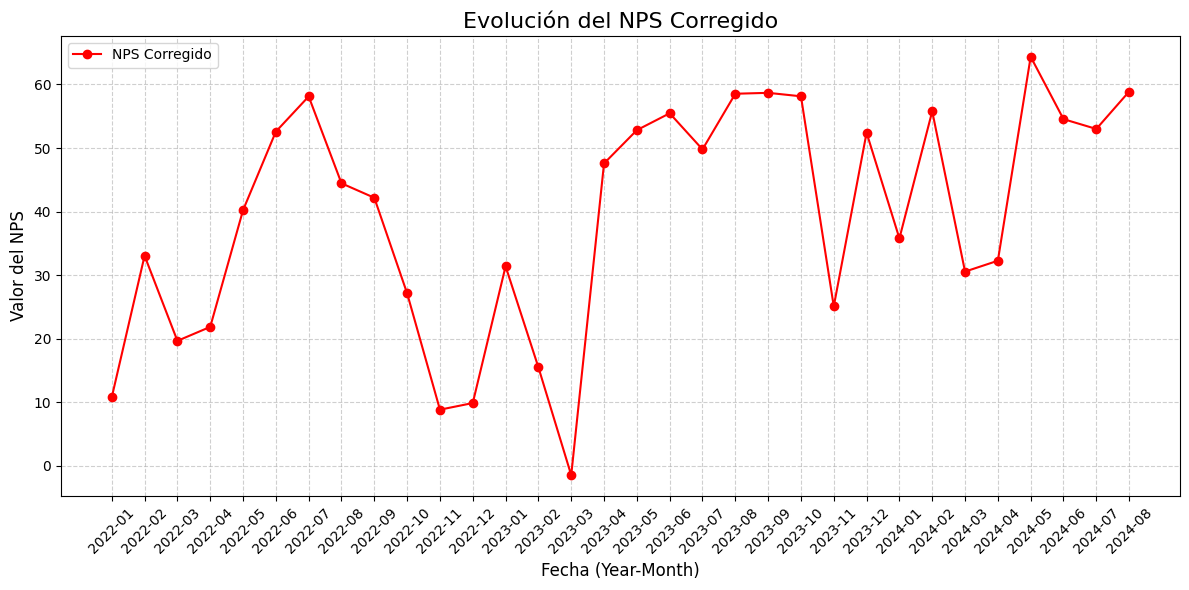

In [131]:
# Graficar NPS Corregido
plt.figure(figsize=(12, 6))
plt.plot(nps_data['Year-Month'], nps_data['NPS_Corregido'], label='NPS Corregido', color='red', marker='o')
plt.title('Evolución del NPS Corregido', fontsize=16)
plt.xlabel('Fecha (Year-Month)', fontsize=12)
plt.ylabel('Valor del NPS', fontsize=12)
plt.xticks(rotation=45)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Número de comentarios de promotores negativos en 2024: 8
Resumen de los comentarios:
count                                                     8
unique                                                    8
top       [traveling, group, booked, hotel, room, well, ...
freq                                                      1
Name: Normalized Translated Overall Comment, dtype: object


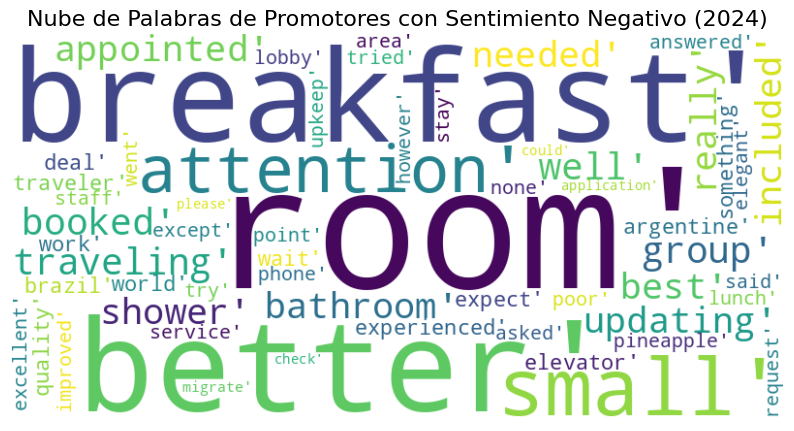

In [132]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Filtrar el dataframe para el grupo específico y año 2024
df_promotores_negativos_2024 = df_final[(df_final['Category_ITR'] == 'Promotor') &
                                         (df_final['Sentiment_Label'] == 'negative') &
                                         (df_final['Year'] == 2024)]

# Revisar el número de registros encontrados
print(f"Número de comentarios de promotores negativos en 2024: {len(df_promotores_negativos_2024)}")

# Resumen estadístico básico de los comentarios
comentarios = df_promotores_negativos_2024['Normalized Translated Overall Comment']
comentarios_resumen = comentarios.describe()

# Mostrar el resumen
print("Resumen de los comentarios:")
print(comentarios_resumen)

# Crear una lista de palabras a excluir (en este caso, "hotel" y "great")
excluded_words = {"hotel'", "great'", "expected'", "need'"}

# Actualizar el conjunto de stopwords para incluir las palabras a excluir
stopwords = STOPWORDS.union(excluded_words)

# Crear una nube de palabras para los comentarios negativos de promotores
comentarios_texto = comentarios.astype(str).str.cat(sep=' ')

# Generar la nube de palabras sin las palabras excluidas
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(comentarios_texto)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Promotores con Sentimiento Negativo (2024)', fontsize=16)
plt.show()


### Conclusiones

Una gran mayoría (1270) tienen sentimientos positivos, lo que refuerza que los promotores suelen estar muy satisfechos.

Sin embargo, también hay un grupo pequeño con sentimientos neutrales (85) y un número casi despreciable con sentimientos negativos (44). Esto podría deberse a discrepancias en el análisis o casos atípicos.

Los comentarios neutrales están distribuidos más equitativamente entre los sentimientos positivos (150), neutrales (107) y negativos (158). Esto indica que los clientes "neutrales" en NPS no necesariamente tienen un sentimiento claramente definido.


Como se esperaba, la mayoría de los detractores tienen sentimientos negativos (409). Sin embargo, hay un número considerable con sentimientos neutrales (64) y algunos con sentimientos positivos (13). Esto podría indicar que algunos detractores valoran ciertos aspectos del servicio/producto, pero tienen críticas fuertes en otras áreas.

**Discrepancias posibles entre las métricas:**

No hay una relación completamente lineal entre las categorías de NPS y los sentimientos detectados, especialmente en las categorías Neutral y Detractor. Esto sugiere que el análisis de sentimiento aporta una capa adicional de información, ayudando a refinar la percepción del cliente.


El análisis de sentimiento parece alinearse con las categorías de NPS en términos generales, pero también revela matices dentro de cada grupo, lo que puede ser valioso para diseñar estrategias de mejora.

#### Resumen y Mejoramiento de los Puntos Clave:

1. **Distribución de Sentimientos en Promotores, Neutrales y Detractores**:
   - **Promotores (1270)**: Predominan los sentimientos positivos, lo que refleja alta satisfacción.
   - **Neutrales (85)**: Grupo pequeño, con algunos comentarios positivos (150) y negativos (158), lo que indica que los clientes neutrales no siempre tienen un sentimiento definido.
   - **Detractores (409)**: La mayoría muestra sentimientos negativos, pero también hay una proporción significativa con sentimientos neutrales (64) y positivos (13), lo que sugiere que algunos detractores valoran aspectos positivos del servicio o producto, pero aún tienen críticas fuertes.

2. **Discrepancias entre NPS y Sentimientos**:
   - No existe una relación completamente lineal entre las categorías de NPS y los sentimientos detectados, especialmente entre los **neutrales** y **detractores**. Esto implica que el análisis de sentimiento proporciona información adicional útil para afinar la percepción del cliente y no debe limitarse solo a las categorías de NPS.




**Promotores con Sentimientos Negativos o Neutrales**: Este grupo podría estar en riesgo de migrar a una categoría más baja (Neutral o Detractor). Se deben **analizar las causas** detrás de la insatisfacción y ofrecer **seguimientos personalizados**, incentivos o beneficios adicionales para mejorar su percepción.

**Neutrales con Sentimientos Positivos**: Tienen un alto potencial para convertirse en **promotores** mediante acciones específicas como programas de fidelización o encuestas de seguimiento que aborden sus preocupaciones y refuercen su satisfacción.
**Detractores con Sentimientos Positivos o Neutrales**: Es importante investigar estos casos para ver si existen oportunidades de **convertirlos en Neutrales o Promotores**. Esto puede implicar mejorar ciertos aspectos de la experiencia que han sido subestimados.

### **Recomendaciones:**

1. **Segmentación de promotores con sentimientos negativos:**
   - **Contactar a los promotores con sentimientos negativos** para realizar una **entrevista de seguimiento personalizada** o una encuesta más profunda. Este contacto puede servir para identificar si hay un desencanto que no se reflejó en la puntuación de NPS.
   - Ofrecer **incentivos o beneficios adicionales** para estos clientes (como descuentos o acceso a un servicio exclusivo) con el fin de **mejorar su percepción**.

2. **Estrategias para los neutros:**
   - **Segmentar y personalizar la experiencia**: Ofrecer promociones personalizadas, descuentos exclusivos o mejoras de servicio para convertir a los neutros en promotores. Es posible que este grupo valore más el **servicio al cliente** o alguna característica adicional del producto.
   - **Encuestas de seguimiento**: Implementar encuestas de **satisfacción** que no se enfoquen solamente en la calificación de NPS, sino en la **experiencia completa** del cliente.
   - **Aumentar la interacción con el cliente**: Incrementar el número de puntos de contacto con estos clientes para fidelizarlos (ej. seguimiento post-compra, newsletters, encuestas de satisfacción) que sean **efectivos**.




## Propuesta de A/B Testing


### **A/B Testing para Manejo de Promotores con Sentimientos Negativos y Neutros:**

#### **Objetivo:**
**Testar distintas estrategias para mejorar la satisfacción de los promotores con sentimientos negativos y convertir a los neutros en promotores.**

#### **Hipótesis:**
1. Ofrecer un **seguimiento personalizado** a los promotores con sentimientos negativos mejorará su percepción de la marca y reducirá la discrepancia entre la calificación de NPS y el sentimiento subyacente.
2. **Estrategias de personalización de la experiencia** mejorarán la conversión de los neutros en promotores.

#### **Diseño del A/B Testing:**

1. **Segmentación de grupos:**
   - **Grupo A (Control):** Promotores con sentimientos negativos y neutros sin intervención.
   - **Grupo B (Intervención):**
     - Promotores con sentimientos negativos: **Envío de encuesta personalizada o contacto directo** para comprender mejor sus inquietudes, seguido de una **oferta personalizada** o incentivo para mejorar su experiencia.
     - Neutros: **Ofrecimiento de promociones personalizadas** (descuentos, servicios exclusivos) y seguimiento posterior para medir su percepción de la marca.

2. **Métricas de Éxito:**
   - **Cambio en la calificación NPS**: Se medirá si el grupo B experimenta una mayor mejora en su puntuación NPS en comparación con el grupo A.
   - **Cambio en los sentimientos**: Se analizarán los comentarios de los promotores con sentimientos negativos después de la intervención para ver si ha habido un cambio hacia sentimientos más positivos.
   - **Tasa de conversión de neutros a promotores**: Se medirá si el grupo B tiene una mayor tasa de conversión de neutros a promotores.

3. **Duración del A/B Testing:**
   - El experimento debe durar lo suficiente como para recopilar un volumen adecuado de datos (generalmente de 4 a 6 semanas dependiendo del tamaño de la muestra).

4. **Proceso de seguimiento:**
   - Después de la intervención, se debe **monitorizar el comportamiento** de los clientes en el tiempo (por ejemplo, satisfacción post-compra, interacción con el servicio de atención al cliente, etc.).



### **Pasos Futuros:**




1. **Recopilar y analizar datos**: Una vez que se haya implementado el A/B testing, será necesario analizar los resultados para determinar qué estrategia tuvo más éxito. Esto permitirá ajustar las estrategias y mejorar la experiencia del cliente a largo plazo.

2. **Expandir la personalización**: Si el A/B testing demuestra que la personalización mejora la satisfacción, se pueden **expandir** las estrategias de personalización a una mayor parte de la base de clientes, segmentando por tipo de cliente o historial de interacción.

3. **Repetir ciclos de feedback**: Después de realizar la intervención, será fundamental seguir recopilando **retroalimentación continua** de los clientes para garantizar que las mejoras implementadas sean sostenibles y sigan impactando positivamente en la experiencia del cliente.

Este enfoque ayudará no solo a abordar a los promotores con sentimientos negativos, sino también a optimizar la conversión de los neutros a promotores mediante estrategias personalizadas y seguimiento.

## Mejoras Aplicables al trabajo